In [5]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Chronic_Kidney_Dsease_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


## 🔹 Step 1: Data Collection 📊 & Data Understanding 🧠

In [3]:
# Drop irrelevant columns
df_cleaned = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Basic information
info = df_cleaned.info()

# Check for missing values and describe the data
missing_values = df_cleaned.isnull().sum()
description = df_cleaned.describe()

info, missing_values, description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1659 non-null   int64  
 1   Gender                         1659 non-null   int64  
 2   Ethnicity                      1659 non-null   int64  
 3   SocioeconomicStatus            1659 non-null   int64  
 4   EducationLevel                 1659 non-null   int64  
 5   BMI                            1659 non-null   float64
 6   Smoking                        1659 non-null   int64  
 7   AlcoholConsumption             1659 non-null   float64
 8   PhysicalActivity               1659 non-null   float64
 9   DietQuality                    1659 non-null   float64
 10  SleepQuality                   1659 non-null   float64
 11  FamilyHistoryKidneyDisease     1659 non-null   int64  
 12  FamilyHistoryHypertension      1659 non-null   i

(None,
 Age                              0
 Gender                           0
 Ethnicity                        0
 SocioeconomicStatus              0
 EducationLevel                   0
 BMI                              0
 Smoking                          0
 AlcoholConsumption               0
 PhysicalActivity                 0
 DietQuality                      0
 SleepQuality                     0
 FamilyHistoryKidneyDisease       0
 FamilyHistoryHypertension        0
 FamilyHistoryDiabetes            0
 PreviousAcuteKidneyInjury        0
 UrinaryTractInfections           0
 SystolicBP                       0
 DiastolicBP                      0
 FastingBloodSugar                0
 HbA1c                            0
 SerumCreatinine                  0
 BUNLevels                        0
 GFR                              0
 ProteinInUrine                   0
 ACR                              0
 SerumElectrolytesSodium          0
 SerumElectrolytesPotassium       0
 SerumElectrolytesCal

## 🔹 Step 2: Data Preprocessing 🧼 + Univariate 📈 & Bivariate 📉 Analysis

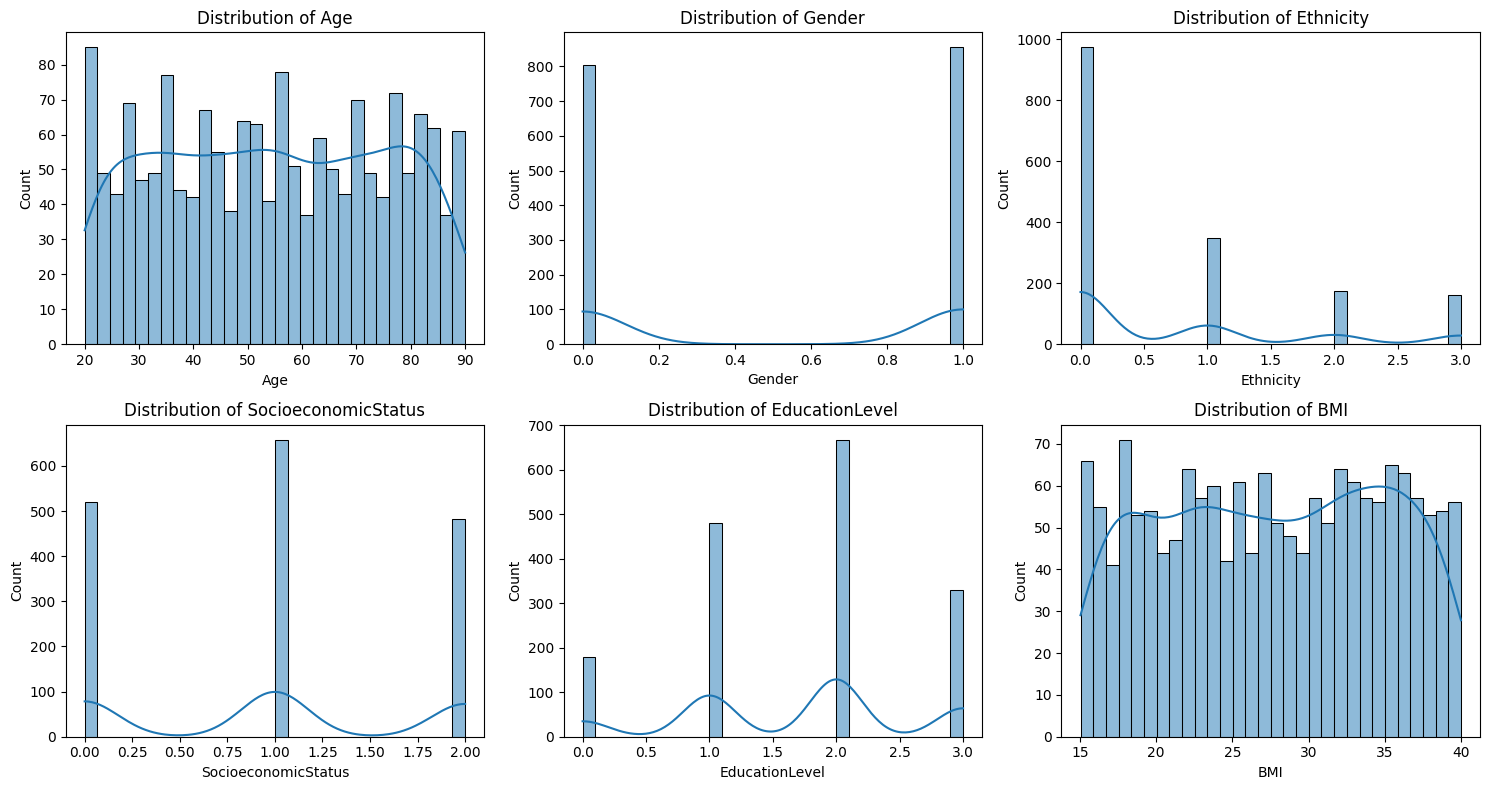

ValueError: could not convert string to float: 'Confidential'

In [6]:


# Drop the first column (ID or unnamed index)
df.drop(columns=df.columns[0], inplace=True)

# Step 2: Data Preprocessing 🧼
# Count missing values
missing_values = df.isnull().sum()

# Impute missing values: numerical columns -> median
df_imputed = df.copy()
for col in df_imputed.columns:
    if df_imputed[col].dtype in ['float64', 'int64']:
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

# Univariate Analysis 📈: Plot distribution for a few key features
selected_features = df_imputed.columns[:6]  # Just pick first 6 for demo

plt.figure(figsize=(15, 8))
for i, col in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_imputed[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Bivariate Analysis 📉: Correlation with target
correlation_with_target = df_imputed.corr()['Diagnosis'].sort_values(ascending=False)

# Plot top 10 correlated features with target
top_features = correlation_with_target[1:11]  # exclude 'Diagnosis' itself

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 10 Features Correlated with Diagnosis")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Output for reference
missing_values.head(10), correlation_with_target.head(10)
